**Installation of required libraries**

In [1]:
!pip install pyaudio

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pyaudio: filename=pyaudio-0.2.14-cp312-cp312-macosx_14_0_arm64.whl size=25805 sha256=bfac5fc2e5b83303cb1dace5f05458286c89ddaf931534a8628b3227639f218b
  Stored in directory: /Users/vamshi/Library/Caches/pip/wheels/68/c7/33/c6a6b210cb5819ec5c219928c794a447742a7d86d21c0b92e6
Successfully built pyaudio


In [2]:
!pip install SpeechRecognition

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.9/32.9 MB 3.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [SpeechRecognition]


In [4]:
!pip install pywhatkit

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requ

In [3]:
!pip install nltk

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 2.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5/5 [nltk]4/5 [nltk]b]


**Recording the audio and converting it into text**

In [1]:
#Importing the libraries for conversion of audio to text
import speech_recognition as sr
import IPython

In [2]:
# Initialize recognizer
r = sr.Recognizer()

# Capture audio from microphone
with sr.Microphone() as source:
    print("Speak something to record the audio...")
    audio = r.listen(source)

# Convert audio to text
try:
    text = r.recognize_google(audio)
    print("You said: " + text)
except sr.UnknownValueError:
    print("Sorry, I could not understand what you said")
except sr.RequestError:
    print("Sorry, my speech service is currently down")

Speak something to record the audio...
You said: I will kill you


In [3]:
#assigning the converted text to a variable
l=text

In [9]:
pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.4/11.4 MB 3.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 2.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [pandas]2m3/4 [pandas]
Note: you may need to restart the kernel to use updated packages.


**Cleaning the dataset**

In [4]:
#importing required libraries for cleaning the dataset(removing nan values,stopwords)
import pandas as pd
import re
import nltk
from tqdm import tqdm
tqdm.pandas()

In [5]:
#downloading the stopwords package
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/vamshi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
#loading the dataset
data = pd.read_csv("Final_dataset.csv",encoding="ISO-8859-1")

In [8]:
import re
import nltk
from tqdm import tqdm
import pandas as pd

tqdm.pandas()

STOP_WORDS = nltk.corpus.stopwords.words() + ["br"]

def clean_sentence(val):
    "Remove chars that are not letters or numbers, downcase, then remove stop words"
    regex = re.compile(r'([^\s\w]|_)+') 
    sentence = regex.sub('', val).lower().split(" ")

    sentence = [word for word in sentence if word not in STOP_WORDS] 
    return " ".join(sentence)

def clean_dataframe(data):
    data = data.dropna(how="any").copy()
    for col in ['Recording']:
        data.loc[:, col] = data[col].progress_apply(clean_sentence)
    return data

# usage
data = clean_dataframe(data)

100%|██████████| 1219/1219 [00:00<00:00, 3939.83it/s]


In [9]:
#creating new csv file for the cleaned data
data.to_csv('dataset_clean.csv')

In [10]:
pip install chardet

Note: you may need to restart the kernel to use updated packages.


**Loading and encoding the data from the dataset**

In [11]:
#importing the chardet library for encoding the data from the dataset
import chardet
# Detect the encoding of the cleaned data file
with open('dataset_clean.csv', 'rb') as f:
    result = chardet.detect(f.read())
encoding = result['encoding']

In [21]:
pip install scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 687.6 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.4/22.4 MB 674.4 kB/s eta 0:00:0000:0100:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [scikit-learn] [scikit-learn]
Note: you may need to restart the kernel to use updated packages.


**Training the data with different ML models**

In [12]:
#importing the required libraries to ready the data for modeling
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [13]:
# Load the data
df = pd.read_csv('dataset_clean.csv',encoding=encoding)
df=df.dropna(how="any")
# Split the data into training and testing sets
X = df['Recording']
y = df['Threat']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state = 0)
# Convert text to bag-of-words features
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

**Logistic regression**

In [14]:
from sklearn.linear_model import LogisticRegression
# Training a logistic regression model
clf_lr = LogisticRegression()
clf_lr.fit(X_train, y_train)

# Making predictions on the test set
y_pred_lr = clf_lr.predict(X_test)

**Decision tree classifier**

In [15]:
from sklearn.tree import DecisionTreeClassifier
# Training a decision tree classifier
clf_dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
clf_dt.fit(X_train, y_train)

# Making predictions on the test set
y_pred_dt = clf_dt.predict(X_test)

**Random forest classifier**

In [16]:
from sklearn.ensemble import RandomForestClassifier
# Train a random forest classifier
clf_rf = RandomForestClassifier(n_estimators = 100,random_state=42)
clf_rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = clf_rf.predict(X_test)

**Naive Bayes classifier**

In [17]:
from sklearn.naive_bayes import MultinomialNB
# Train a Naive Bayes classifier
clf_nb = MultinomialNB()
clf_nb.fit(X_train, y_train)

# Make predictions on the test set
y_pred_nb = clf_nb.predict(X_test)

In [29]:
pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 1.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 659.1 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6/6 [matplotlib]6 [matplotlib]
Note: you may need to restart the kernel to use updated packages.


In [31]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


**Making the confusion matrix**

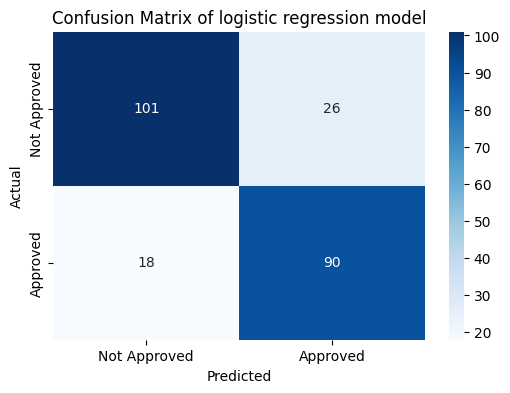

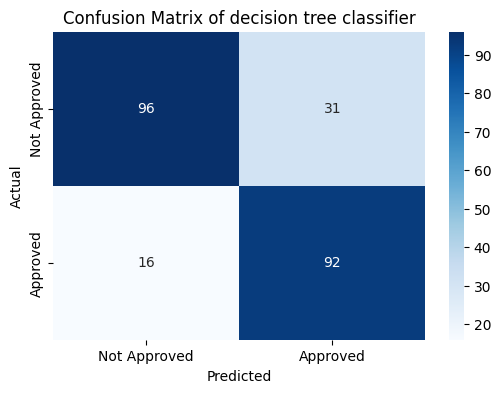

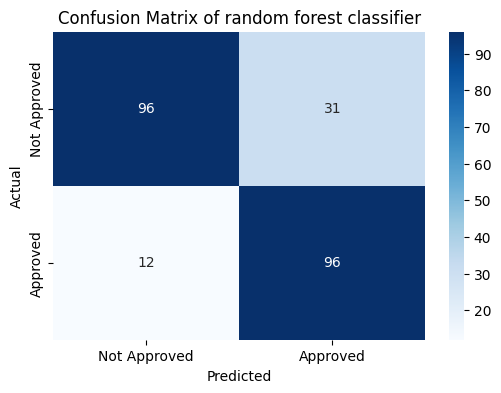

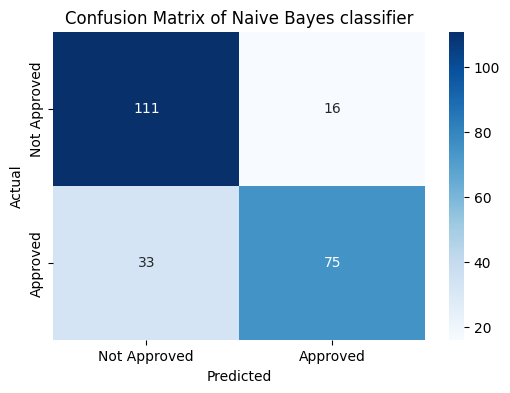

In [18]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

#Making the confusion matrix for logistic regression model
cm_lr= confusion_matrix(y_test, y_pred_lr)
# Create a DataFrame to display the confusion matrix
cm_df = pd.DataFrame(cm_lr, index=['Not Approved', 'Approved'], columns=['Not Approved', 'Approved'])

# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix of logistic regression model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#Making the confusion matrix for decision tree classifier
cm_dt= confusion_matrix(y_test, y_pred_dt)
# Create a DataFrame to display the confusion matrix
cm_df = pd.DataFrame(cm_dt, index=['Not Approved', 'Approved'], columns=['Not Approved', 'Approved'])

# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix of decision tree classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#Making the confusion matrix for random forest classifier
cm_rf= confusion_matrix(y_test, y_pred_rf)
# Create a DataFrame to display the confusion matrix
cm_df = pd.DataFrame(cm_rf, index=['Not Approved', 'Approved'], columns=['Not Approved', 'Approved'])

# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix of random forest classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#Making the confusion matrix for Naive Bayes classifier
cm_nb= confusion_matrix(y_test, y_pred_nb)
# Create a DataFrame to display the confusion matrix
cm_df = pd.DataFrame(cm_nb, index=['Not Approved', 'Approved'], columns=['Not Approved', 'Approved'])
print()
# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix of Naive Bayes classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


**Calculating the accuracy of the trained models**

In [19]:
from sklearn.metrics import accuracy_score

#Calculate accuracy score for logistic regression model
acc_lr= accuracy_score(y_test, y_pred_lr)
print('Accuracy of logistic regression model :', acc_lr*100)

#Calculate accuracy score for decision tree classifier
acc_dt= accuracy_score(y_test, y_pred_dt)
print('Accuracy of decision tree classifier :', acc_dt*100)

#Calculate accuracy score for random forest classifier
acc_rf= accuracy_score(y_test, y_pred_rf)
print('Accuracy of random forest classifier :', acc_rf*100)

#Calculate accuracy score for Naive Bayes classifier
acc_nb= accuracy_score(y_test, y_pred_nb)
print('Accuracy of Naive Bayes classifier :', acc_nb*100)

Accuracy of logistic regression model : 81.27659574468085
Accuracy of decision tree classifier : 80.0
Accuracy of random forest classifier : 81.70212765957446
Accuracy of Naive Bayes classifier : 79.14893617021276


**Testing the text which was generated by converting the recorded audio**

In [20]:
raw_text =l
raw_text_bow = vectorizer.transform([raw_text])
# Using  the model to predict the output of the raw text
output = clf_lr.predict(raw_text_bow)[0]
print(output)

0.0


**Sending the alert messages through whatsapp using pywhatkit library**

In [23]:
#importing the required libraries to send the messages
import pywhatkit
import datetime
#storing the numbers to which you want to send the alert
registernumbers=["+91-7732004234"]

if output==0:
    for j in range(0,len(registernumbers)):
        number=registernumbers[j]
        message = "Threatening call alert"
        pywhatkit.sendwhatmsg(number, message, datetime.datetime.now().hour, datetime.datetime.now().minute + 1)
else:
    print("it's not a threaten call")

In 45 Seconds WhatsApp will open and after 15 Seconds Message will be Delivered!
